In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

from yellowbrick.regressor import ResidualsPlot

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
#from statsmodels.formula.api import ols
#import statsmodels.regression.linear_model as sm

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn import metrics

In [2]:
df = pd.read_csv(r"C:\Users\Dell\fish.csv")

In [3]:
x = df.iloc[:,2:7]
y = df['Weight']

In [4]:
df.isnull().sum()

Species         0
Weight          0
Length_ver      0
Length_diag     0
Length_cross    0
Height          0
Width           0
dtype: int64

<AxesSubplot:>

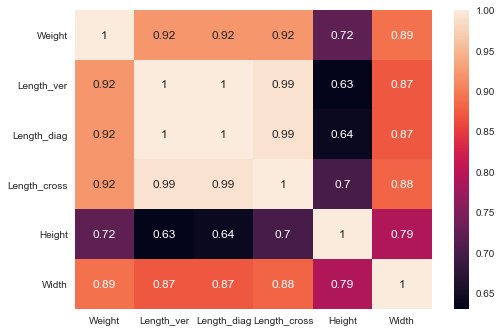

In [5]:
data1 = df.corr().round(2)
sns.heatmap(data1, annot=True)

Length_ver, Length_diag, Length_cross are highly correlated with 'Weight'. But minimum and maximum value of all three is similar

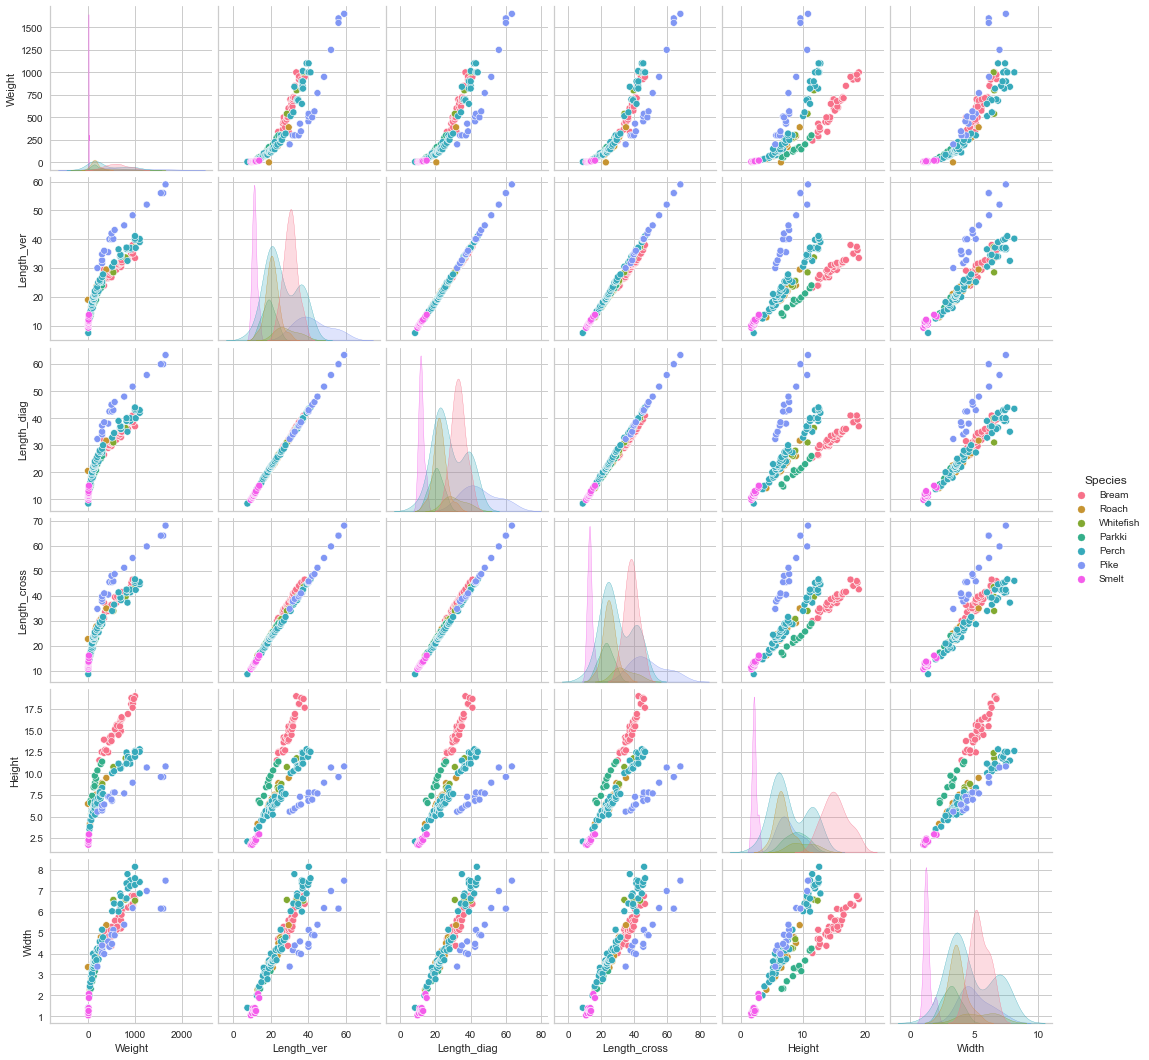

In [6]:
g = sns.pairplot(df, kind='scatter', hue='Species')

The above Pair-Plot tells us that there is a LINEAR RELATION between variables.

In [7]:
df.describe()

,Weight,Length_ver,Length_diag,Length_cross,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [8]:
df_new = pd.get_dummies(df, drop_first=True)

In [9]:
df_new

,Weight,Length_ver,Length_diag,Length_cross,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,13.4,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.2,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,19.7,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


<AxesSubplot:>

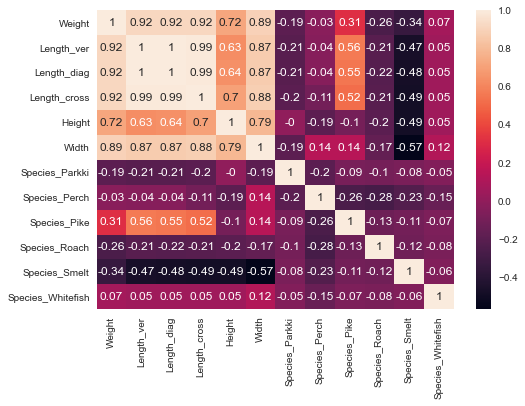

In [10]:
data1 = df_new.corr().round(2)
sns.heatmap(data1, annot=True)

In [11]:
x_new = df_new.iloc[:,2:13]
y_new = df['Weight']

In [12]:
# forward stepwise selection
lreg = LinearRegression()
sfs2 = sfs(lreg, k_features=10, forward=True, floating=False, verbose=2, cv = 2, n_jobs = -1, scoring='neg_mean_squared_error')

In [13]:
sfs2.fit(x_new, y_new)
sfs2.subsets_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.6s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished

[2021-08-24 12:22:39] Features: 1/10 -- score: -20128.8355691904[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-08-24 12:22:39] Features: 2/10 -- score: -16280.570294336261[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-08-24 12:22:39]

{1: {'feature_idx': (1,),
  'cv_scores': array([ -9543.84877299, -30713.82236539]),
  'avg_score': -20128.8355691904,
  'feature_names': ('Length_cross',)},
 2: {'feature_idx': (1, 3),
  'cv_scores': array([ -8444.71364442, -24116.42694425]),
  'avg_score': -16280.570294336261,
  'feature_names': ('Length_cross', 'Width')},
 3: {'feature_idx': (1, 3, 7),
  'cv_scores': array([ -8444.71364442, -23622.81658346]),
  'avg_score': -16033.765113942007,
  'feature_names': ('Length_cross', 'Width', 'Species_Roach')},
 4: {'feature_idx': (1, 3, 4, 7),
  'cv_scores': array([ -8444.71364442, -23595.61609751]),
  'avg_score': -16020.164870968329,
  'feature_names': ('Length_cross',
   'Width',
   'Species_Parkki',
   'Species_Roach')},
 5: {'feature_idx': (1, 3, 4, 7, 9),
  'cv_scores': array([ -8444.71364442, -24452.87542576]),
  'avg_score': -16448.794535093733,
  'feature_names': ('Length_cross',
   'Width',
   'Species_Parkki',
   'Species_Roach',
   'Species_Whitefish')},
 6: {'feature_idx': 

In [14]:
feat_names = list(sfs2.k_feature_names_)
print(feat_names)

['Length_diag', 'Length_cross', 'Height', 'Width', 'Species_Parkki', 'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt', 'Species_Whitefish']


# Model 1 -

In [15]:
x1 = df_new[['Length_cross', 'Width', 'Species_Parkki', 'Species_Roach']]
y1 = df_new['Weight']

In [16]:
# OLS Regression Results 
x1 = sm.add_constant(x1)
results1 = sm.OLS(y1, x1).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     290.7
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.19e-70
Time:                        12:22:39   Log-Likelihood:                -989.50
No. Observations:                 159   AIC:                             1989.
Df Residuals:                     154   BIC:                             2004.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -492.2842     31.811    -15.

In [17]:
x1 = df_new[['Length_cross', 'Width', 'Species_Roach']]
y1 = df_new['Weight']

In [18]:
# OLS Regression Results 
x1 = sm.add_constant(x1)
results1 = sm.OLS(y1, x1).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     389.9
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           5.78e-72
Time:                        12:22:39   Log-Likelihood:                -989.54
No. Observations:                 159   AIC:                             1987.
Df Residuals:                     155   BIC:                             1999.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -495.0198     30.159    -16.413

In [19]:
xx = df_new[['Length_cross', 'Width']]
yy = df_new['Weight']

In [20]:
# OLS Regression Results 
xx = sm.add_constant(xx)
results1 = sm.OLS(yy, xx).fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     556.4
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           9.97e-72
Time:                        12:22:39   Log-Likelihood:                -993.47
No. Observations:                 159   AIC:                             1993.
Df Residuals:                     156   BIC:                             2002.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -520.9390     29.332    -17.760   

In [21]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.3, random_state = len(df['Width']))

In [22]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [23]:
print('Coefficients: ', regressor.coef_)

Coefficients:  [ 0.         17.30917984 83.64030928]


In [24]:
y_train_pred = regressor.predict(X_train)

y_test_pred = regressor.predict(X_test)

In [25]:
#Training data results
df1 = pd.DataFrame({'Actual weight': y_train, 'Predicted weight': y_train_pred})
df1.head()

,Actual weight,Predicted weight
106,250.0,345.828467
4,430.0,503.219454
38,87.0,135.086310
57,306.0,409.991203
87,120.0,186.895808


<AxesSubplot:xlabel='Actual weight', ylabel='Predicted weight'>

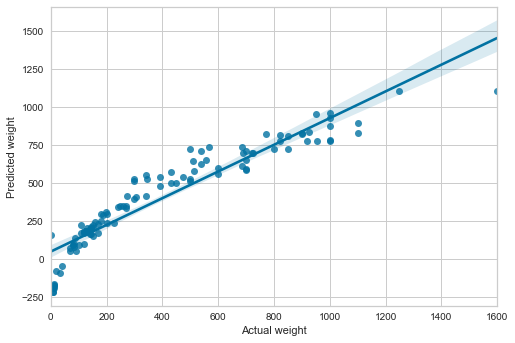

In [26]:
sns.regplot(x='Actual weight',y='Predicted weight',data=df1)

In [27]:
#Testing data results
df2 = pd.DataFrame({'Actual weight': y_test, 'Predicted weight': y_test_pred})

In [28]:
df2.head()

,Actual weight,Predicted weight
75,51.5,3.123723
114,700.0,691.252759
49,161.0,251.167785
22,620.0,614.101628
6,500.0,523.960069


<AxesSubplot:xlabel='Actual weight', ylabel='Predicted weight'>

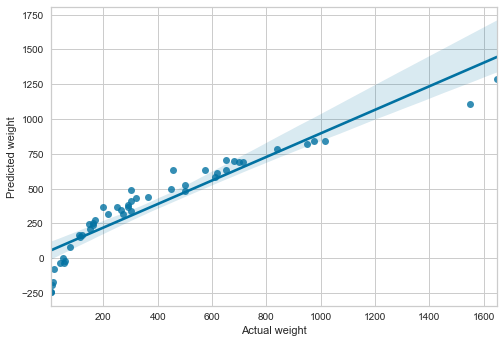

In [29]:
sns.regplot(x='Actual weight',y='Predicted weight',data=df2)

In [30]:
print('Training set values:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score:', metrics.r2_score(y_train, y_train_pred))  

Training set values:

Mean Absolute Error: 95.09734344700774
Mean Squared Error: 14914.259884103603
Root Mean Squared Error: 122.12395294987631
R2 score: 0.8777358331846001


In [31]:
print('Testing set values:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score:', metrics.r2_score(y_test, y_test_pred)) 

Testing set values:

Mean Absolute Error: 101.01923034542672
Mean Squared Error: 17884.453570551374
Root Mean Squared Error: 133.7327692472992
R2 score: 0.8719891881380966


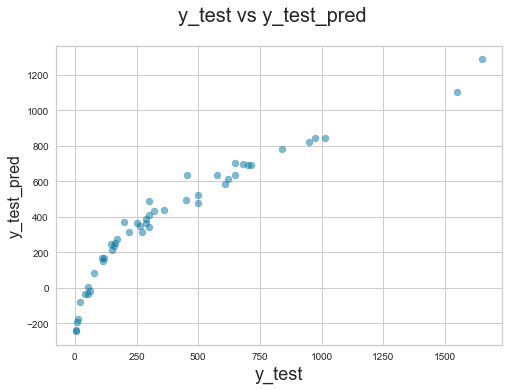

In [32]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

# Model 2 -

In [33]:
x2 = df_new.iloc[:,2:12]
y2 = df_new['Weight']

In [34]:
# Backward elimination
# OLS Regression Results 
x2 = sm.add_constant(x2)
results = sm.OLS(y2, x2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           5.08e-82
Time:                        12:22:40   Log-Likelihood:                -944.07
No. Observations:                 159   AIC:                             1910.
Df Residuals:                     148   BIC:                             1944.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -866.3015    126.52

In [35]:
#x2 = df_new['Length_diag','Length_cross','']
x2 = df_new.iloc[:,3:12]
y2 = df_new['Weight']

In [36]:
# OLS Regression Results 
x2 = sm.add_constant(x2)
results = sm.OLS(y2, x2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     234.1
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           3.25e-83
Time:                        12:22:40   Log-Likelihood:                -944.08
No. Observations:                 159   AIC:                             1908.
Df Residuals:                     149   BIC:                             1939.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -878.8500     83.22

In [37]:
x2 = df_new.iloc[:,[3,4,6,7,8,9,10,11]]
y2 = df_new['Weight']

In [38]:
# OLS Regression Results 
x2 = sm.add_constant(x2)
results = sm.OLS(y2, x2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     265.1
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.96e-84
Time:                        12:22:40   Log-Likelihood:                -944.10
No. Observations:                 159   AIC:                             1906.
Df Residuals:                     150   BIC:                             1934.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -869.2938     63.75

In [39]:
x2 = df_new.iloc[:,[3,6,7,8,9,10,11]]
y2 = df_new['Weight']

In [40]:
# OLS Regression Results 
x2 = sm.add_constant(x2)
results = sm.OLS(y2, x2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     303.9
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.37e-85
Time:                        12:22:40   Log-Likelihood:                -944.34
No. Observations:                 159   AIC:                             1905.
Df Residuals:                     151   BIC:                             1929.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -837.6337     43.66

In [41]:
x2 = df_new.iloc[:,[3,6,7,8,10,11]]
y2 = df_new['Weight']

In [42]:
# OLS Regression Results 
x2 = sm.add_constant(x2)
results = sm.OLS(y2, x2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     352.0
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.85e-86
Time:                        12:22:40   Log-Likelihood:                -945.38
No. Observations:                 159   AIC:                             1905.
Df Residuals:                     152   BIC:                             1926.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -798.7323     33.86

In [43]:
x2 = df_new.iloc[:,[3,6,7,8,10]]
y2 = df_new['Weight']

In [44]:
# OLS Regression Results 
x2 = sm.add_constant(x2)
results = sm.OLS(y2, x2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     420.4
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.91e-87
Time:                        12:22:40   Log-Likelihood:                -946.22
No. Observations:                 159   AIC:                             1904.
Df Residuals:                     153   BIC:                             1923.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -794.4147     33.761    -23.

In [45]:
# now removing all the negative coefficient
x2 = df_new.iloc[:,[3,6,7,10]]
y2 = df_new['Weight']

In [46]:
# OLS Regression Results 
x2 = sm.add_constant(x2)
results = sm.OLS(y2, x2).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     299.0
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.74e-71
Time:                        12:22:41   Log-Likelihood:                -987.51
No. Observations:                 159   AIC:                             1985.
Df Residuals:                     154   BIC:                             2000.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -690.7743     41.612    -16.

In [47]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.3, random_state = len(df['Width']))

In [48]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
print('Coefficients: ', regressor.coef_)

Coefficients:  [  0.          32.70580858  91.47194539 105.8010745  279.26743727]


In [50]:
y_train_pred = regressor.predict(X_train)

y_test_pred = regressor.predict(X_test)

In [51]:
#Training data results
df3 = pd.DataFrame({'Actual weight': y_train, 'Predicted weight': y_train_pred})
#df3.head()

In [52]:
# sns.regplot(x='Actual weight',y='Predicted weight',data=df3)

In [53]:
#Training data results
df4 = pd.DataFrame({'Actual weight': y_test, 'Predicted weight': y_test_pred})
#df4.head()

In [54]:
# sns.regplot(x='Actual weight',y='Predicted weight',data=df4)

In [55]:
print('Training set values:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score:', metrics.r2_score(y_train, y_train_pred))  

Training set values:

Mean Absolute Error: 86.70735741896648
Mean Squared Error: 14856.52578520186
Root Mean Squared Error: 121.88734874958048
R2 score: 0.8782091259630492


In [56]:
print('Testing set values:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score:', metrics.r2_score(y_test, y_test_pred))  

Testing set values:

Mean Absolute Error: 88.06795815440294
Mean Squared Error: 13797.163156239141
Root Mean Squared Error: 117.46132621522345
R2 score: 0.9012446172842806


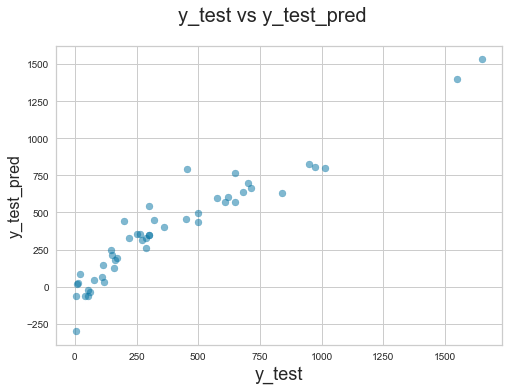

In [57]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [58]:
print("AIC of Model 1: ",results1.aic)
print("AIC of Model 2: ",results.aic)

AIC of Model 1:  1992.948151886283
AIC of Model 2:  1985.0254399918936


# Model 3-

In [59]:
x3 = df_new[['Length_cross', 'Height', 'Width']]
y3 = df_new['Weight']

In [60]:
# OLS Regression Results 
x3 = sm.add_constant(x3)
results3 = sm.OLS(y3, x3).fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     371.3
Date:                Tue, 24 Aug 2021   Prob (F-statistic):           1.61e-70
Time:                        12:22:41   Log-Likelihood:                -992.96
No. Observations:                 159   AIC:                             1994.
Df Residuals:                     155   BIC:                             2006.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -521.0000     29.331    -17.763   

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.3, random_state = len(df['Width']))

In [62]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

In [63]:
y_train_pred = regressor.predict(X_train)

y_test_pred = regressor.predict(X_test)

In [64]:
print('Training set values:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_train_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_train_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('R2 score:', metrics.r2_score(y_train, y_train_pred))  

Training set values:

Mean Absolute Error: 92.9733894400096
Mean Squared Error: 14562.544138526018
Root Mean Squared Error: 120.67536674286936
R2 score: 0.8806191296353167


In [65]:
print('Testing set values:\n')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 score:', metrics.r2_score(y_test, y_test_pred))  

Testing set values:

Mean Absolute Error: 102.7608748015341
Mean Squared Error: 18610.02471067986
Root Mean Squared Error: 136.41856439165403
R2 score: 0.8667957976693851


In [66]:
print("AIC of Model 1: ",results1.aic)
print("AIC of Model 2: ",results.aic)
print("AIC of Model 3: ",results3.aic)

AIC of Model 1:  1992.948151886283
AIC of Model 2:  1985.0254399918936
AIC of Model 3:  1993.9231387106206
